# Recurrent Neural Networks.

- A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data. (Sequential Modelling).
- These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning.
- They are incorporated into popular applications such as Siri, voice search, and Google Translate etc.

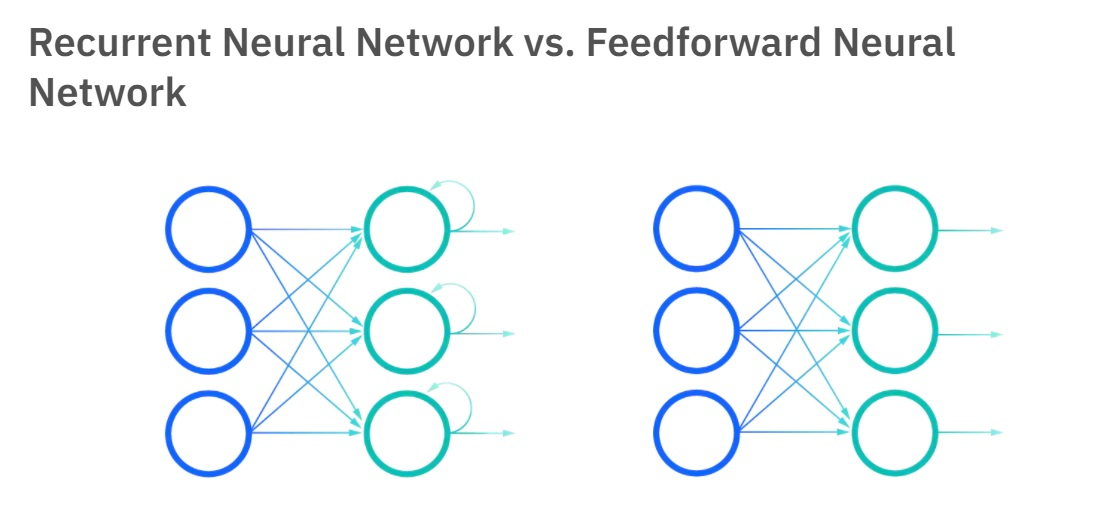

In [1]:
from IPython import display
display.Image("./rnn.jpg")

In [1]:
# standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data 
df=pd.read_csv('data/data.csv',parse_dates=True,index_col='DATE')
df.head(2)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524


In [3]:
# rename the RSCCASN column to sales 
df.columns=['Sales']
df.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


<AxesSubplot:xlabel='DATE'>

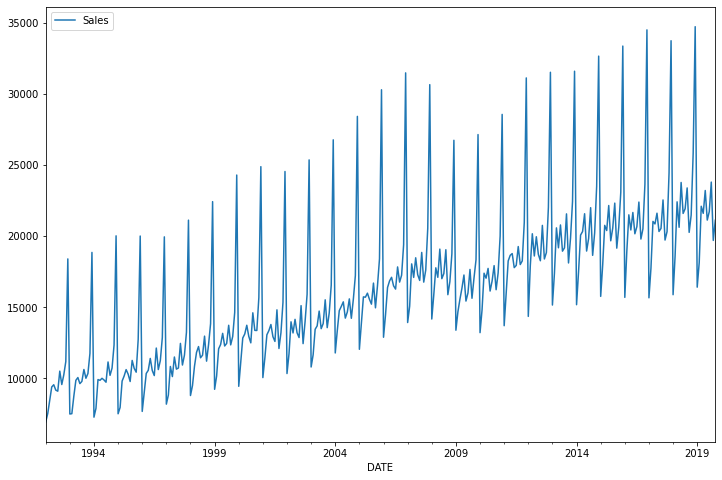

In [4]:
# plot the data 
df.plot(figsize=(12,8))

In [63]:
# check  the first and last date 
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [6]:
#first date 1992-01-01
#last date  2019-10-01

In [64]:
#total dataframe length
len(df)

334

In [5]:
#Data is monthly, let's forecast 1.5 years into the future.
len(df)-18

316

In [6]:
# test data 
test_size = 18
test_ind = len(df)- test_size

In [7]:
# training & test data 
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
train.shape

(316, 1)

In [68]:
test.shape

(18, 1)

In [9]:
# scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [10]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Let's redefine to get 12 months back and then predict the next month out
length = 12

# create an instance of the class and specify the input and output aspects of your time series problem (input,output,length of traning data )
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=5)

In [11]:

# What does the first batch look like?
X,y = generator[0]

In [13]:
y

array([[0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484]])

In [75]:
scaled_train[:15]

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654]])

In [14]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266
 0.02127505 0.05580163 0.08942056 0.09512053 0.08146965 0.07860151
 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266 0.02047633
 0.05580163 0.08942056 0.09512053 0.08146965 0.07860151 0.12979233
 0.09566512 0.1203892  0.15426227 0.41595266 0.02047633 0.02127505
 0.08942056 0.09512053 0.08146965 0.07860151 0.12979233 0.09566512
 0.1203892  0.15426227 0.41595266 0.02047633 0.02127505 0.06636654
 0.09512053 0.08146965 0.07860151 0.12979233 0.09566512 0.1203892
 0.15426227 0.41595266 0.02047633 0.02127505 0.06636654 0.10633895]
Predict this y: 
 [[0.02047633]
 [0.02127505]
 [0.06636654]
 [0.10633895]
 [0.11345484]]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [17]:
# We're only using one feature in our time series
n_features = 1
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(100,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100)               10200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Stop training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
61/61 [==============================] - 3s 18ms/step - loss: 0.0136 - val_loss: 0.0015
Epoch 2/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0012 - val_loss: 6.7859e-04
Epoch 3/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 4/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 5/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0013 - val_loss: 8.8397e-04
Epoch 6/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0022 - val_loss: 7.3415e-04


<AxesSubplot:>

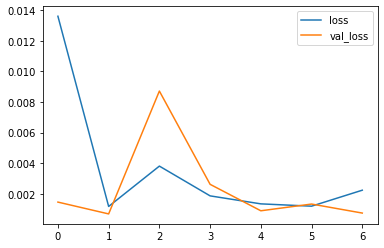

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [21]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [22]:
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
current_batch

array([[[0.64375401],
        [0.94310069],
        [0.37982619],
        [0.45604903],
        [0.58820111],
        [0.52951676],
        [0.55835497],
        [0.55991578],
        [0.54214513],
        [0.60357565],
        [0.49663886],
        [0.50895327]]])

In [23]:
test_predictions

[array([0.5451618], dtype=float32),
 array([0.5253102], dtype=float32),
 array([0.5175285], dtype=float32),
 array([0.58513975], dtype=float32),
 array([0.479461], dtype=float32),
 array([0.4958769], dtype=float32),
 array([0.643754], dtype=float32),
 array([0.9431007], dtype=float32),
 array([0.3798262], dtype=float32),
 array([0.45604903], dtype=float32),
 array([0.5882011], dtype=float32),
 array([0.52951676], dtype=float32),
 array([0.558355], dtype=float32),
 array([0.5599158], dtype=float32),
 array([0.54214513], dtype=float32),
 array([0.60357565], dtype=float32),
 array([0.49663886], dtype=float32),
 array([0.5089533], dtype=float32)]

In [24]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[21953.9361701 ],
       [21407.1446538 ],
       [21192.80429697],
       [23055.08931351],
       [20144.27417707],
       [20596.43356228],
       [24669.56032562],
       [32914.76542854],
       [17399.93252468],
       [19499.41434622],
       [23139.4112525 ],
       [21523.00954199],
       [22317.32939816],
       [22360.32027245],
       [21870.84554386],
       [23562.88761759],
       [20617.4208777 ],
       [20956.60895967]])

In [26]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\user\AppData\Local\Temp/ipykernel_25680/1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [27]:
test['Loss'] = abs(test['Sales'] - test['Predictions'])

C:\Users\user\AppData\Local\Temp/ipykernel_25680/1668801594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loss'] = abs(test['Sales'] - test['Predictions'])


In [92]:
test.head()

,Sales,Predictions,Loss
DATE,,,
2018-05-01,23764,20488.137143,3275.862857
2018-06-01,21589,18942.975905,2646.024095
2018-07-01,21919,18397.455924,3521.544076
2018-08-01,23381,23322.671634,58.328366
2018-09-01,20260,17632.766378,2627.233622


In [28]:
sum(test['Loss'])

14048.501372098941

<AxesSubplot:xlabel='DATE'>

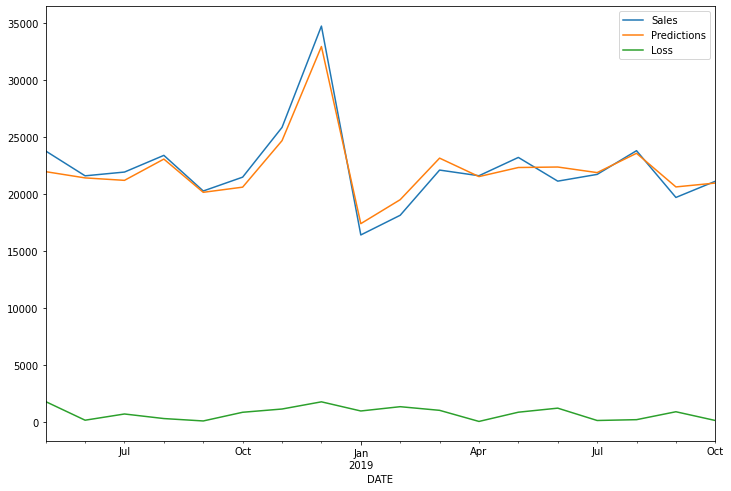

In [29]:
test.plot(figsize=(12,8))

- This kind of RNN suffered from the problem of <b>vanishing & exploding gradients </b>hence unable to model long term dependencies.
- Therefore, LSTM and GRU were developed to solve the problem with traditional RNNS.
- There two architecture use mechanisms known as <b>Gates</b>

In [33]:
#model
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [34]:
# We're only using one feature in our time series
n_features = 1

In [36]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [39]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [41]:
# fit model
model.fit(generator,epochs=25,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/25
61/61 [==============================] - 1s 14ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 2/25
61/61 [==============================] - 1s 22ms/step - loss: 0.0016 - val_loss: 3.6700e-04
Epoch 3/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/25
61/61 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 5/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0012 - val_loss: 3.0881e-04
Epoch 6/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0011 - val_loss: 2.4314e-04
Epoch 7/25
61/61 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 8/25
61/61 [==============================] - 1s 14ms/step - loss: 9.9351e-04 - val_loss: 7.6045e-04
Epoch 9/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 3.8049e-04
Epoch 10/25
61/61 [==============================] - 1s 13ms/step - loss: 0.0050 - va

In [42]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

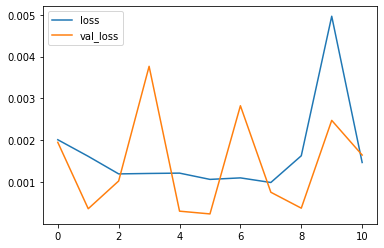

In [43]:
losses.plot()

Evaluate on Test Data¶


In [44]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [45]:
true_predictions = scaler.inverse_transform(test_predictions)

In [46]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\user\AppData\Local\Temp/ipykernel_25680/1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [47]:
test['Loss'] = abs(test['Sales'] - test['Predictions'])

C:\Users\user\AppData\Local\Temp/ipykernel_25680/1668801594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loss'] = abs(test['Sales'] - test['Predictions'])


In [48]:
sum(test['Loss'])

12371.136914968487

In [49]:
test.head()

,Sales,Predictions,Loss
DATE,,,
2018-05-01,23764,22326.434546,1437.565454
2018-06-01,21589,21159.862576,429.137424
2018-07-01,21919,21378.322085,540.677915
2018-08-01,23381,23232.885950,148.114050
2018-09-01,20260,20745.090772,485.090772


<AxesSubplot:xlabel='DATE'>

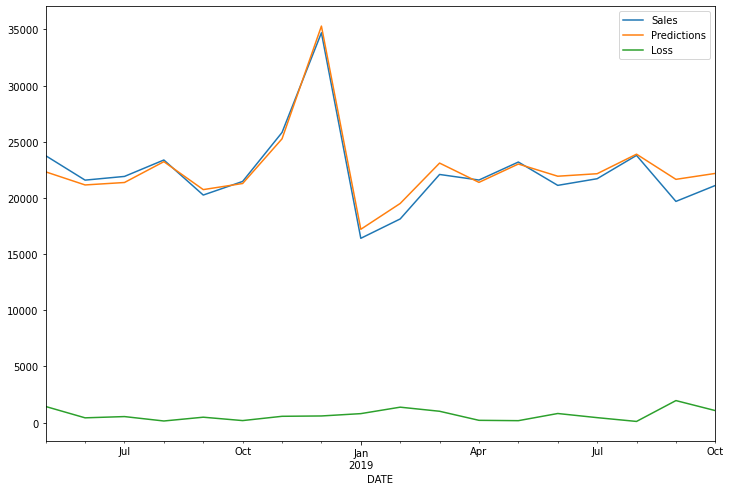

In [50]:
test.plot(figsize=(12,8))

In [51]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [52]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [53]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
#model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(generator,epochs=8)


Epoch 1/8
322/322 [==============================] - 6s 10ms/step - loss: 0.0264
Epoch 2/8
322/322 [==============================] - 3s 10ms/step - loss: 0.0191
Epoch 3/8
322/322 [==============================] - 4s 13ms/step - loss: 0.0133
Epoch 4/8
322/322 [==============================] - 3s 10ms/step - loss: 0.0079
Epoch 5/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0046
Epoch 6/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0018
Epoch 7/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0013
Epoch 8/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0018


In [54]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [55]:
forecast = scaler.inverse_transform(forecast)

In [57]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [58]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [59]:
forecast_df

,Forecast
2019-11-01,24657.751215
2019-12-01,32162.172299
2020-01-01,17754.158219
2020-02-01,19033.984693
2020-03-01,21703.104629
2020-04-01,21355.698765
2020-05-01,22504.419983
2020-06-01,21018.335489
2020-07-01,21485.958520
2020-08-01,22929.623469


<AxesSubplot:>

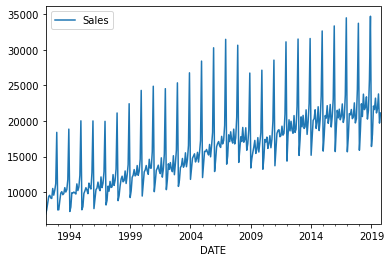

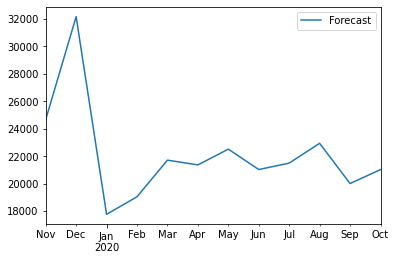

In [60]:
df.plot()
forecast_df.plot()

<AxesSubplot:xlabel='DATE'>

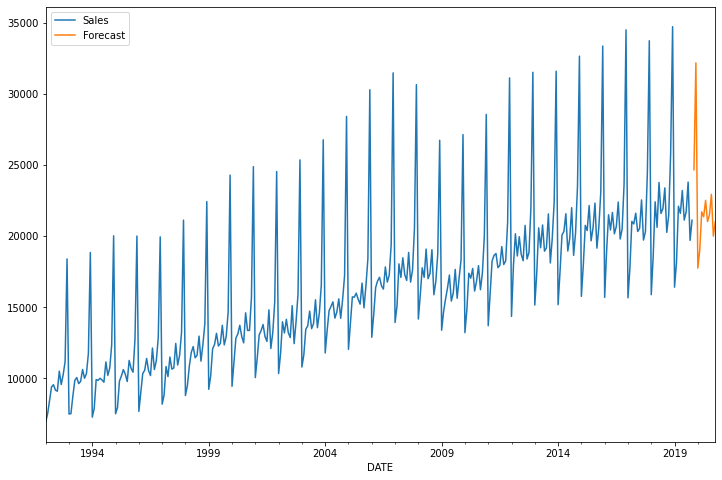

In [61]:
ax = df.plot(figsize=(12,8))
forecast_df.plot(ax=ax)

(576.0, 611.0)

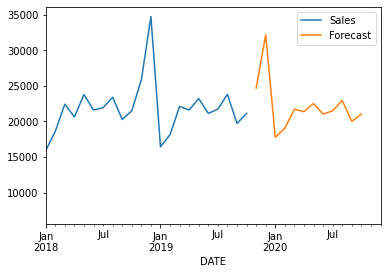

In [62]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

# END